In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [16]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sales_clean.xlsx')

data.head()

,Tanggal,Nomor Transaksi,Nama Panggilan,Nama Produk,Kuantitas,Harga per Unit,Total,Platform,Status Pelanggan,Kategori produk,Tipe Pelanggan,Lokasi,Cost Produksi,Profit,Provinsi,encoding_provinsi,Bulan
0,2024-01-02 00:00:00,SKG.INV-1/2024,Chloe,Custom Mirror 400mm x 700mm Rose,1,2100000.0,2100000.0,WhatsApp,Repeat Order,Furniture,B2C,Singapore,1050000.0,1050000,Singapura,3,1
1,2024-01-02 00:00:00,SKG.INV-2/2024,Chloe,Custom Top Table 750x250x20mm Bilberry,2,800000.0,1600000.0,WhatsApp,New Customer,Furniture,B2C,Singapore,800000.0,800000,Singapura,3,1
2,2024-01-02 00:00:00,SKG.INV-2/2024,Chloe,Custom Top Table 450x200x20mm Light Terrarium,1,500000.0,500000.0,WhatsApp,New Customer,Furniture,B2C,Singapore,250000.0,250000,Singapura,3,1
3,2024-01-02 00:00:00,SKG.INV-2/2024,Chloe,Custom Top Table 600x200x20mm Peach,1,700000.0,700000.0,WhatsApp,New Customer,Furniture,B2C,Singapore,350000.0,350000,Singapura,3,1
4,2024-01-02 00:00:00,SKG.INV-2/2024,Chloe,Shipping,1,1650000.0,1650000.0,WhatsApp,New Customer,Furniture,B2C,Singapore,825000.0,825000,Singapura,3,1


In [17]:
# Langkah 2: Eksplorasi Dataset
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())

# Mengecek data kosong
print("\nJumlah Data Kosong:")
print(data.isnull().sum())

# Jika ada data kosong, kita bisa menangani dengan cara berikut (hapus atau imputasi):
data = data.dropna()  # Menghapus data kosong

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            1632 non-null   object 
 1   Nomor Transaksi    1632 non-null   object 
 2   Nama Panggilan     1632 non-null   object 
 3   Nama Produk        1632 non-null   object 
 4   Kuantitas          1632 non-null   int64  
 5   Harga per Unit     1632 non-null   float64
 6   Total              1632 non-null   float64
 7   Platform           1632 non-null   object 
 8   Status Pelanggan   1632 non-null   object 
 9   Kategori produk    1632 non-null   object 
 10  Tipe Pelanggan     1632 non-null   object 
 11  Lokasi             1632 non-null   object 
 12  Cost Produksi      1632 non-null   float64
 13  Profit             1632 non-null   int64  
 14  Provinsi           1632 non-null   object 
 15  encoding_provinsi  1632 non-null   int64  
 16  Bulan

# **CLUSTER 1**

<Figure size 1000x600 with 0 Axes>

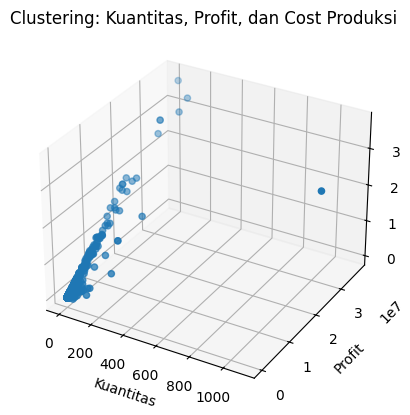

In [46]:
#CLUSTERING 1

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih kolom untuk clustering
columns = ['Kuantitas', 'Profit', 'Cost Produksi']
X = data[columns]

# Menstandarkan data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah kluster (misalnya, 3 kluster)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan fitting model KMeans
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (scatter plot) tanpa warna yang dibedakan
plt.figure(figsize=(10, 6))

# Visualisasi 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot tanpa warna (hanya titik-titik saja)
ax.scatter(data['Kuantitas'], data['Profit'], data['Cost Produksi'])

# Menambahkan label dan title
ax.set_xlabel('Kuantitas')
ax.set_ylabel('Profit')
ax.set_zlabel('Cost Produksi')
ax.set_title('Clustering: Kuantitas, Profit, dan Cost Produksi')

plt.show()


In [47]:
z = data.iloc[:, [4,13,12]].values

In [48]:
columns = data.columns[[4,13,12]]
print(columns)


Index(['Kuantitas', 'Profit', 'Cost Produksi'], dtype='object')


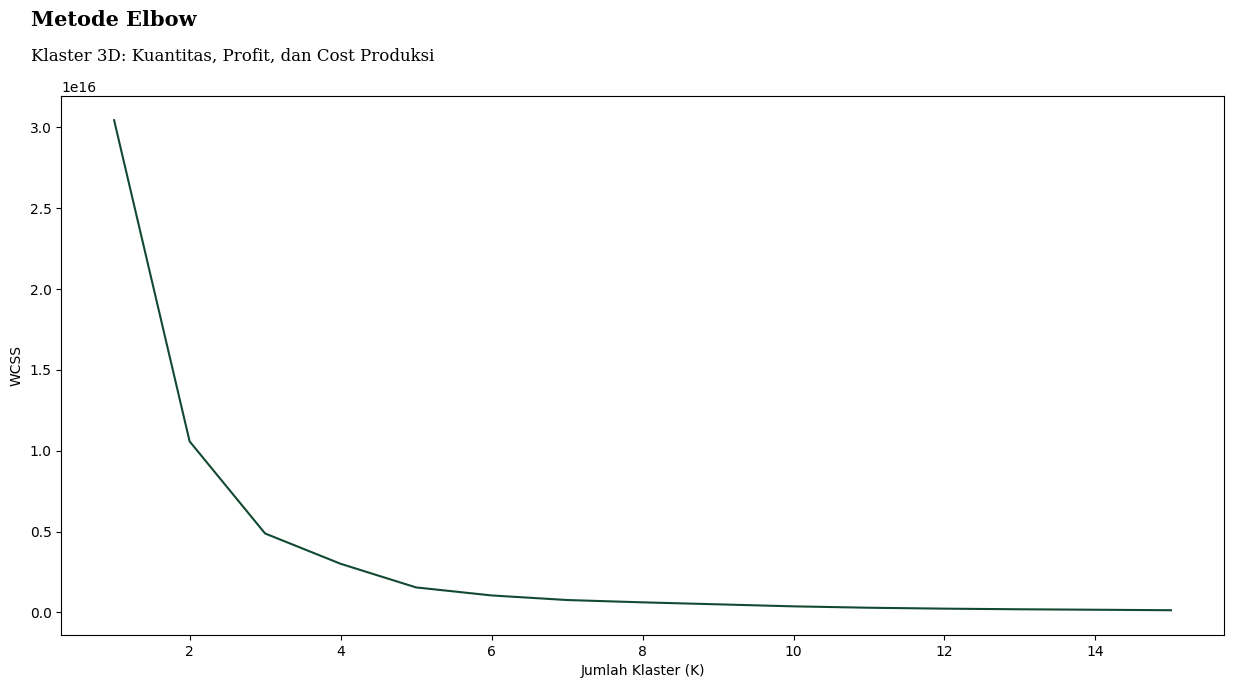

In [49]:
# Mengasumsikan 'z' berisi 'Kuantitas', 'Profit', dan 'Cost Produksi'
wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                n_init=10, random_state=0)
    km.fit(z)  # Pastikan z berisi 'Kuantitas', 'Profit', 'Cost Produksi'
    wcss.append(km.inertia_)

# Membuat plot Metode Elbow
fig, ax = plt.subplots(figsize=(15, 7))

# Menambahkan teks deskripsi ke plot
fig.text(0.105, 0.98, 'Metode Elbow', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 3D: Kuantitas, Profit, dan Cost Produksi',
         fontsize=12, fontweight='light', fontfamily='serif')

# Plot WCSS terhadap jumlah klaster (K)
plt.plot(range(1, 16), wcss, '#114a31')

# Menambahkan label dan judul
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')

# Menampilkan plot
plt.show()


In [50]:
from sklearn.metrics import silhouette_score

In [51]:
range_n_clusters = [2,3,5]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',
                       max_iter=300, n_init=10, random_state=0)
    y_means = clusterer.fit_predict(z)
    silhouette_avg = silhouette_score(z, y_means)

    print("Jumlah klaster =", n_clusters,
          "nilai rata-rata silhouette =", silhouette_avg)

Jumlah klaster = 2 nilai rata-rata silhouette = 0.9007061554837589
Jumlah klaster = 3 nilai rata-rata silhouette = 0.860951237562401
Jumlah klaster = 5 nilai rata-rata silhouette = 0.7358314259129898


In [52]:
selected_cols = ['Kuantitas', 'Profit', 'Cost Produksi']
cluster_data = data.loc[:, selected_cols]

kmeans_sel = KMeans(n_clusters=2, random_state=0).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_, columns=['Cluster'])
clustered_data = cluster_data.assign(Cluster=labels)

In [53]:
clustered_data

,Kuantitas,Profit,Cost Produksi,Cluster
0,1,1050000,1050000.0,0
1,2,800000,800000.0,0
2,1,250000,250000.0,0
3,1,350000,350000.0,0
4,1,825000,825000.0,0
...,...,...,...,...
1627,3,37500,37500.0,0
1628,6,2250000,2250000.0,0
1629,6,2250000,2250000.0,0
1630,1,75000,75000.0,0


In [54]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Kuantitas,Profit,Cost Produksi
0,0,3.4,723263.6,723263.6
1,1,49.9,13423039.2,13423039.2


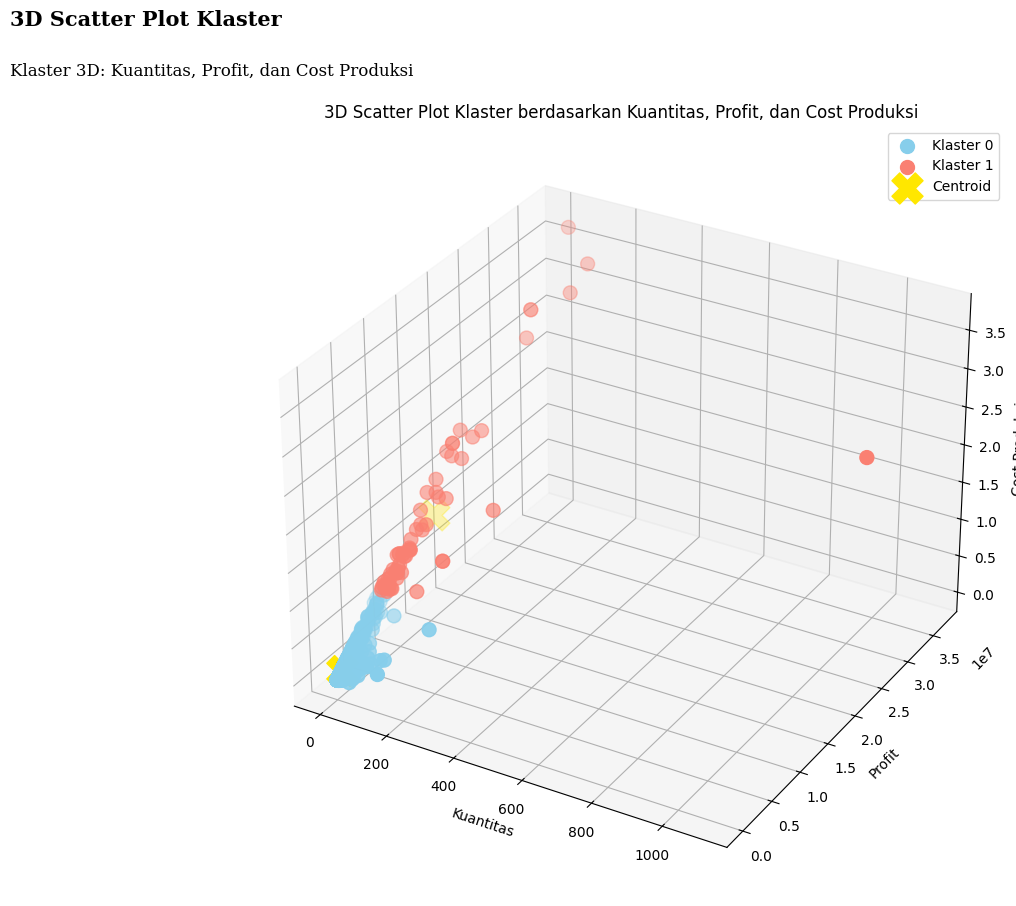

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Menyiapkan data yang sudah dikelompokkan
x_clustered = clustered_data[['Kuantitas', 'Profit', 'Cost Produksi']].values

# Menentukan warna untuk setiap klaster
colors = ['skyblue', 'salmon']

# Membuat plot 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
fig.text(0.105, 0.98, '3D Scatter Plot Klaster', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 3D: Kuantitas, Profit, dan Cost Produksi', fontsize=12, fontweight='light', fontfamily='serif')

# Scatter plot untuk setiap klaster dengan warna yang berbeda
for i in range(2):  # Karena kita memiliki 2 klaster
    ax.scatter(x_clustered[labels['Cluster'] == i, 0],  # Kuantitas
               x_clustered[labels['Cluster'] == i, 1],  # Profit
               x_clustered[labels['Cluster'] == i, 2],  # Cost Produksi
               s=100, c=colors[i], label=f'Klaster {i}')

# Menambahkan centroid ke plot 3D
centroids = kmeans_sel.cluster_centers_  # Mendapatkan pusat klaster (centroid)

# Scatter plot untuk centroid dengan warna hijau
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=500, c='#FFE700', marker='X', label='Centroid')

# Menambahkan label dan legenda
ax.set_xlabel('Kuantitas')
ax.set_ylabel('Profit')
ax.set_zlabel('Cost Produksi')
ax.set_title('3D Scatter Plot Klaster berdasarkan Kuantitas, Profit, dan Cost Produksi')
ax.legend()

# Menampilkan plot
plt.show()


# **CLUSTER 2**

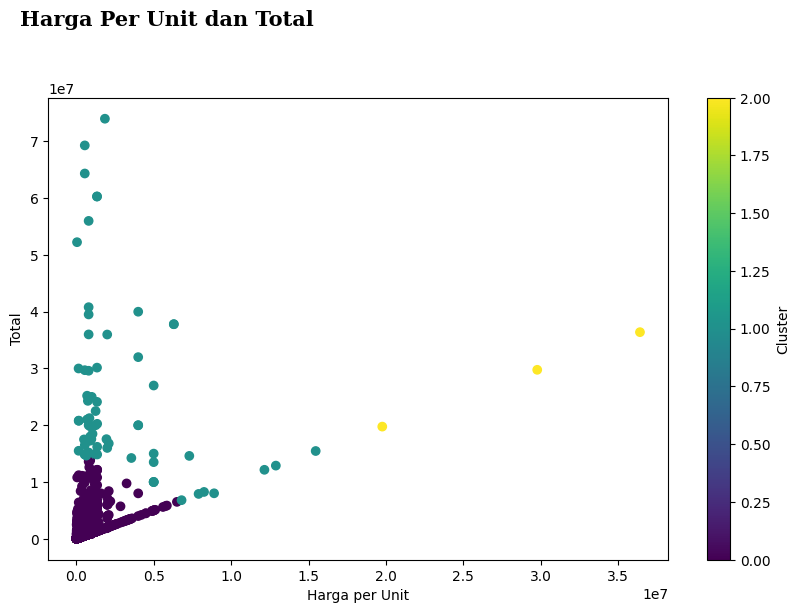

In [56]:
#CLUSTERING 2

# Memilih kolom untuk clustering (Harga per Unit dan Total)
columns = ['Harga per Unit', 'Total']
X = data[columns]

# Menstandarkan data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah kluster (misalnya, 3 kluster)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan fitting model KMeans
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (scatter plot) tanpa warna yang dibedakan
fig, ax = plt.subplots(figsize=(10, 6))  # Buat objek fig dan ax


fig.text(0.097, 1, 'Harga Per Unit dan Total', fontfamily='serif',
         fontsize=15, fontweight='bold')

# Scatter plot untuk data berdasarkan klaster
scatter = ax.scatter(data['Harga per Unit'], data['Total'], c=data['Cluster'], cmap='viridis')

# Menambahkan label dan title
ax.set_xlabel('Harga per Unit')
ax.set_ylabel('Total')

# Menambahkan color bar untuk menunjukkan klaster
plt.colorbar(scatter, ax=ax, label='Cluster')

# Menampilkan plot
plt.show()


In [44]:
x = data.iloc[:, [5,6]].values

In [57]:
columns = data.columns[[5,6]]
print(columns)


Index(['Harga per Unit', 'Total'], dtype='object')


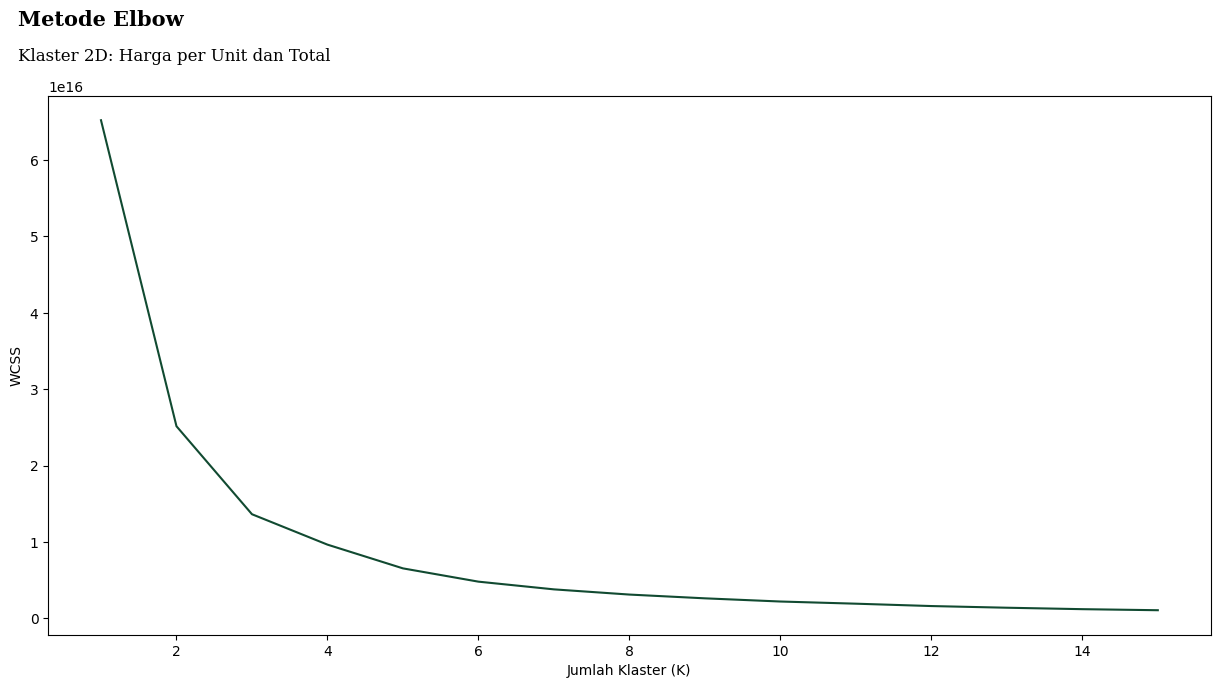

In [58]:
wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, 0.98, 'Metode Elbow', fontsize=15, fontweight='bold',
         fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 2D: Harga per Unit dan Total',
         fontsize=12, fontweight='light', fontfamily='serif')

plt.plot(range(1, 16), wcss, '#114a31')
#plt.title('Metode Elbow', fontsize = 20)
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.show()

In [59]:
range_n_clusters = [2, 3, 5]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',
                       max_iter=300, n_init=10, random_state=0)
    y_means = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, y_means)

    print("Jumlah klaster =", n_clusters,
          "nilai rata-rata silhouette =", silhouette_avg)

Jumlah klaster = 2 nilai rata-rata silhouette = 0.8917962800092808
Jumlah klaster = 3 nilai rata-rata silhouette = 0.8447868558538002
Jumlah klaster = 5 nilai rata-rata silhouette = 0.7046515403558063


In [60]:
selected_cols = ["Harga per Unit", "Total"]
cluster_data = data.loc[:, selected_cols]

kmeans_sel = KMeans(n_clusters=2, random_state=0).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_, columns=['Cluster'])
clustered_data = cluster_data.assign(Cluster=labels)

In [61]:
clustered_data

,Harga per Unit,Total,Cluster
0,2100000.0,2100000.0,0
1,800000.0,1600000.0,0
2,500000.0,500000.0,0
3,700000.0,700000.0,0
4,1650000.0,1650000.0,0
...,...,...,...
1627,25000.0,75000.0,0
1628,750000.0,4500000.0,0
1629,750000.0,4500000.0,0
1630,150000.0,150000.0,0


In [62]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Harga per Unit,Total
0,0,632363.0,1446527.2
1,1,3086355.0,26846078.4


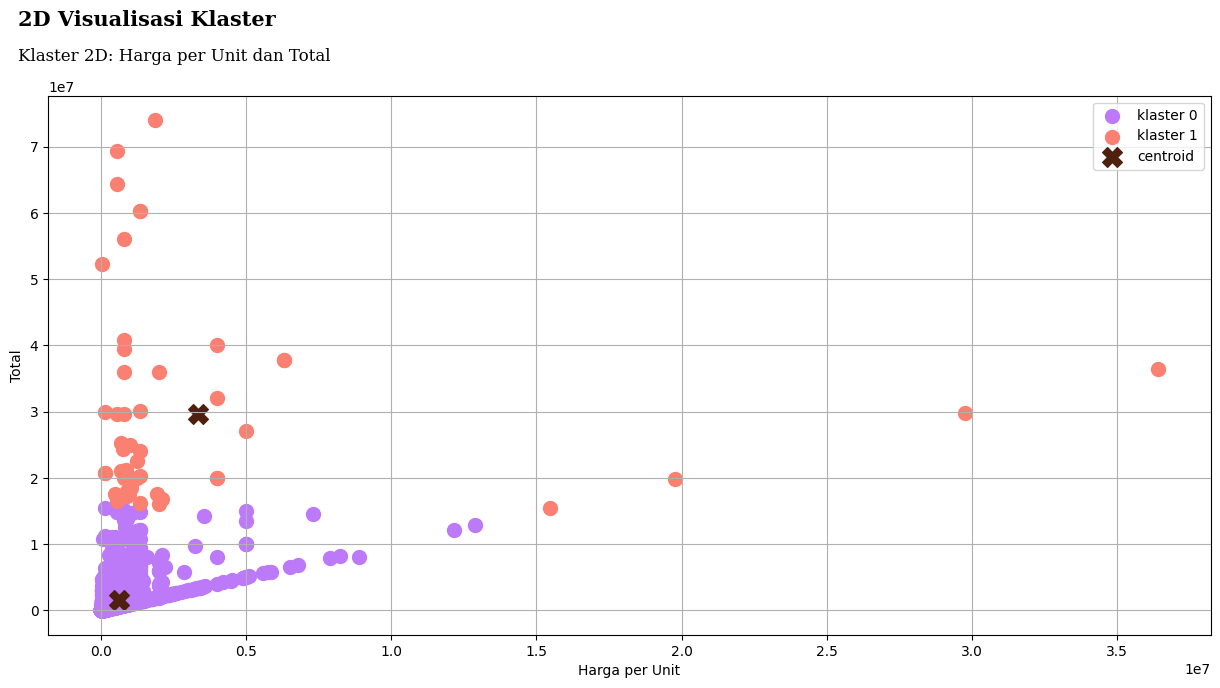

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, 0.98, '2D Visualisasi Klaster', fontsize=15,
         fontweight='bold', fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 2D: Harga per Unit dan Total',
         fontsize=12, fontweight='light', fontfamily='serif')

km = KMeans(n_clusters=2, init='k-means++', max_iter=300,
            n_init=10, random_state=0)
y_means = km.fit_predict(x)  # Prediksi klaster

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100,
            c='#BC7AF9', label='klaster 0')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100,
            c='salmon', label='klaster 1')

# Scatter plot untuk centroid dengan warna
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=200, c='#4F200D', marker='X', label='centroid')

plt.xlabel('Harga per Unit')
plt.ylabel('Total')
plt.legend()
plt.grid()
plt.show()


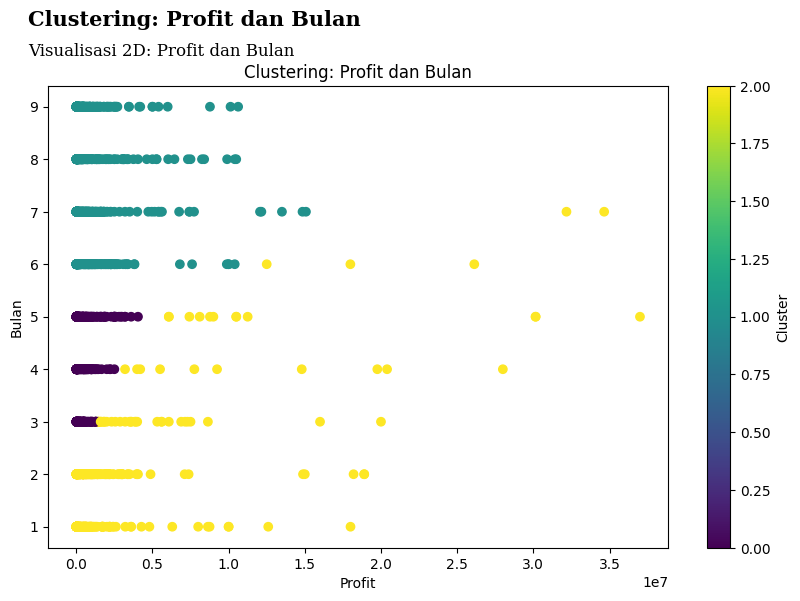

In [64]:
#CLUSTERING 3

# Memilih kolom untuk clustering (Profit dan Bulan)
columns = ['Profit', 'Bulan']
X = data[columns]

# Menstandarkan data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah kluster (misalnya, 3 kluster)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan fitting model KMeans
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering (scatter plot) tanpa warna yang dibedakan
fig, ax = plt.subplots(figsize=(10, 6))  # Buat objek fig dan ax

# Menambahkan teks ke figure (opsional)
fig.text(0.105, 0.98, 'Clustering: Profit dan Bulan', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, 0.93, 'Visualisasi 2D: Profit dan Bulan', fontsize=12, fontweight='light', fontfamily='serif')

# Scatter plot untuk data berdasarkan klaster
scatter = ax.scatter(data['Profit'], data['Bulan'], c=data['Cluster'], cmap='viridis')

# Menambahkan label dan title
ax.set_xlabel('Profit')
ax.set_ylabel('Bulan')
ax.set_title('Clustering: Profit dan Bulan')

# Menambahkan color bar untuk menunjukkan klaster
plt.colorbar(scatter, ax=ax, label='Cluster')

# Menampilkan plot
plt.show()


In [65]:
x = data.iloc[:, [13,16]].values

In [66]:
columns= data.columns[[13, 16]]
print(columns)

Index(['Profit', 'Bulan'], dtype='object')


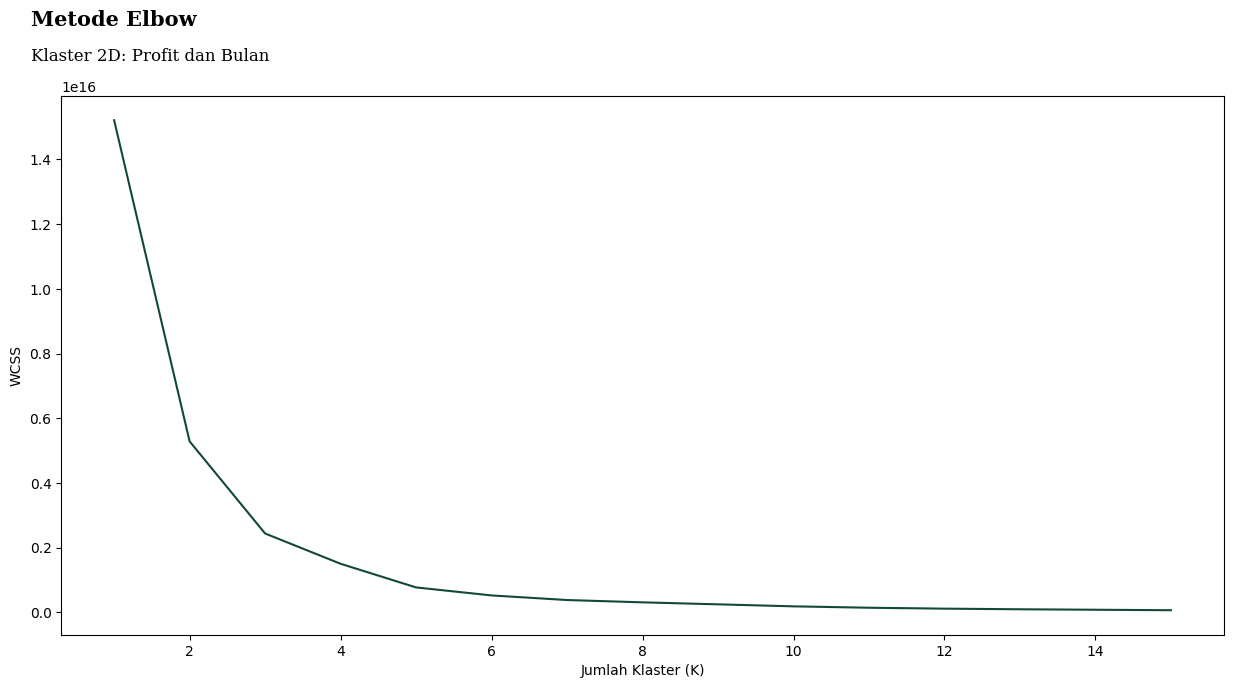

In [67]:
wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, 0.98, 'Metode Elbow', fontsize=15, fontweight='bold',
         fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 2D: Profit dan Bulan',
         fontsize=12, fontweight='light', fontfamily='serif')

plt.plot(range(1, 16), wcss, '#114a31')
#plt.title('Metode Elbow', fontsize = 20)
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.show()


In [68]:
range_n_clusters = [2, 3, 5]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',
                       max_iter=300, n_init=10, random_state=0)
    y_means = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, y_means)

    print("Jumlah klaster =", n_clusters,
          "nilai rata-rata silhouette =", silhouette_avg)


Jumlah klaster = 2 nilai rata-rata silhouette = 0.9007061530014274
Jumlah klaster = 3 nilai rata-rata silhouette = 0.8609512339521216
Jumlah klaster = 5 nilai rata-rata silhouette = 0.7358314090470456


In [69]:
selected_cols = ["Bulan", "Profit"]
cluster_data = data.loc[:, selected_cols]

kmeans_sel = KMeans(n_clusters=2, random_state=0).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_, columns=['Cluster'])
clustered_data = cluster_data.assign(Cluster=labels)

clustered_data

,Bulan,Profit,Cluster
0,1,1050000,0
1,1,800000,0
2,1,250000,0
3,1,350000,0
4,1,825000,0
...,...,...,...
1627,9,37500,0
1628,9,2250000,0
1629,9,2250000,0
1630,9,75000,0


In [70]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Bulan,Profit
0,0,5.0,723263.6
1,1,4.9,13423039.2


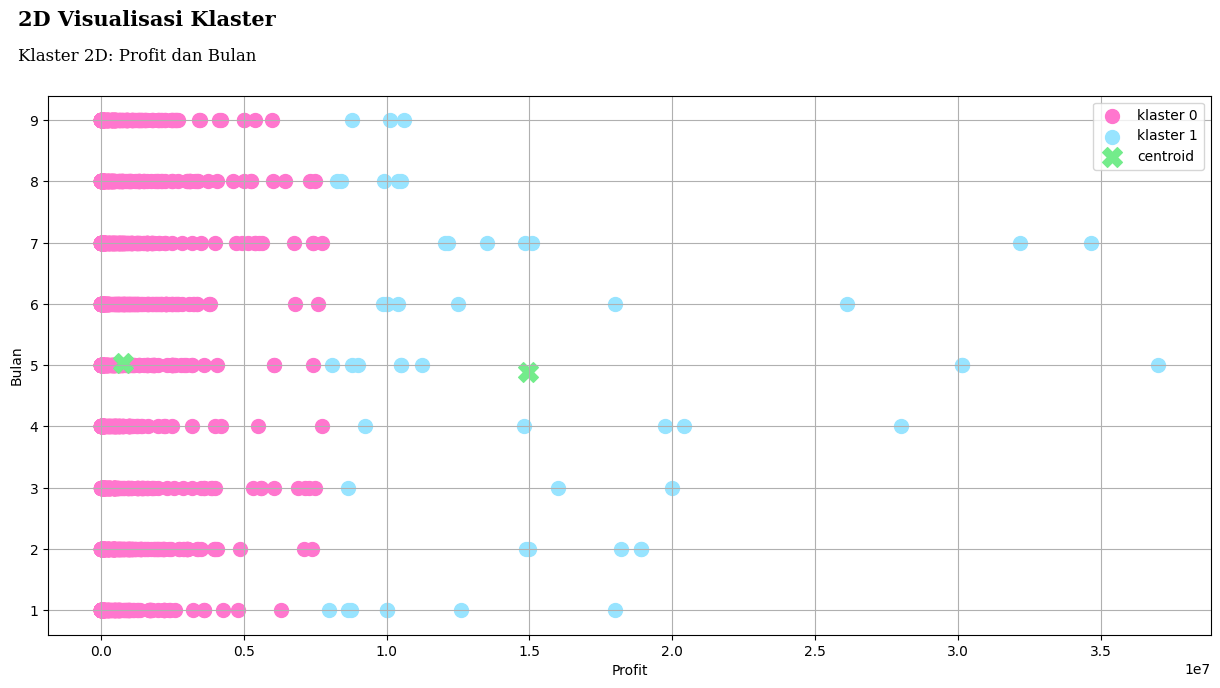

In [71]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.text(0.105, 0.98, '2D Visualisasi Klaster', fontsize=15,
         fontweight='bold', fontfamily='serif')
fig.text(0.105, 0.93, 'Klaster 2D: Profit dan Bulan',
         fontsize=12, fontweight='light', fontfamily='serif')

km = KMeans(n_clusters=2, init='k-means++', max_iter=300,
            n_init=10, random_state=0)
y_means = km.fit_predict(x)  # Prediksi klaster

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100,
            c='#FF76CE', label='klaster 0')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100,
            c='#98E4FF', label='klaster 1')

# Scatter plot untuk centroid dengan warna hijau
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=200, c='#73EC8B', marker='X', label='centroid')

plt.xlabel('Profit')
plt.ylabel('Bulan')
plt.legend()
plt.grid()
plt.show()